### **1. 지하수 데이터 수집**

In [1]:
#코드 8-11
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date, time

warnings.filterwarnings('ignore')

In [5]:
#코드 8-12
path = './대전태평(암반)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py

['대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [9]:
import glob

path = './대전태평(암반)/*.xlsx'
file_list = glob.glob(path)
file_list

['./대전태평(암반)\\대전태평(암반)_2009_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2010_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2011_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2012_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2013_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2014_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2015_hr.xlsx',
 './대전태평(암반)\\대전태평(암반)_2016_hr.xlsx']

In [6]:
#코드 8-13
df = pd.DataFrame()
for i in file_list_py:
  data = pd.read_excel(path + i)
  df = pd.concat([df, data])
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [10]:
df_list = [pd.read_excel(file) for file in file_list]
final_df = pd.concat(df_list, ignore_index=True)

final_df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [12]:
#코드 8-14
df = df.reset_index(drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [ ]:
#코드 8-15
df.info()

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [ ]:
#코드 8-16
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d') +\
             pd.to_timedelta(df['시간'].astype(int),unit='h') # 시 단위로 해석

df.set_index(df['Date'], inplace=True)
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


In [14]:
#코드 8-17
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749


In [15]:
#코드 8-18
df1.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [16]:
#코드 8-19
df1.to_csv('./대전지하수.csv', encoding='cp949')

### **2. 이상치 확인 및 제거**

In [17]:
#코드 8-20
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True, encoding='cp949')
df.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


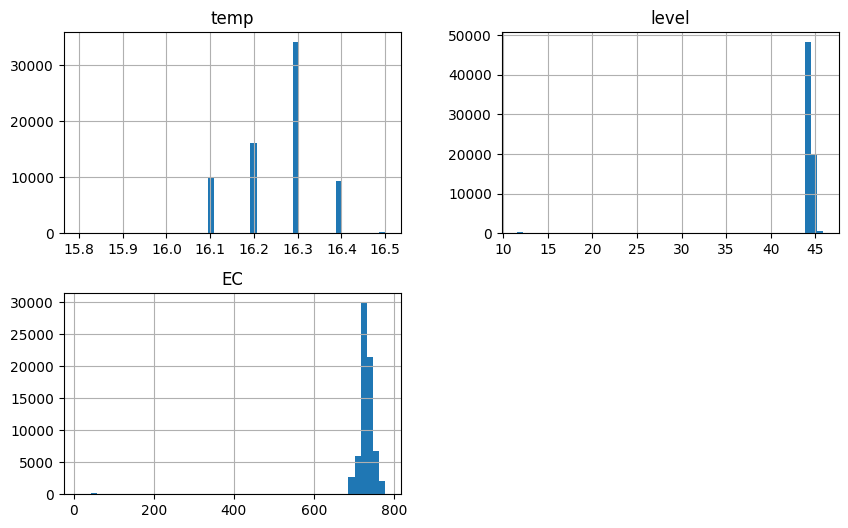

In [18]:
#코드 8-21
df.hist(bins=50, figsize=(10,6))
plt.show()

<Axes: >

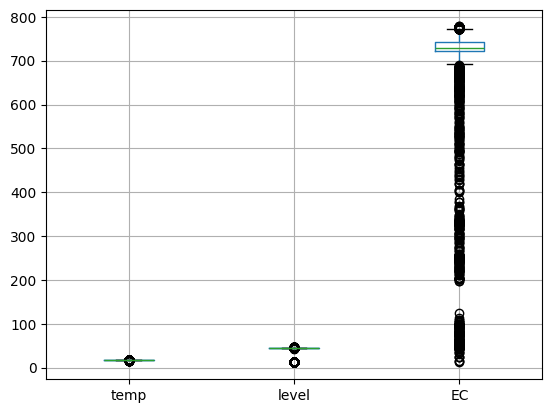

In [19]:
#코드 8-22
df.boxplot()

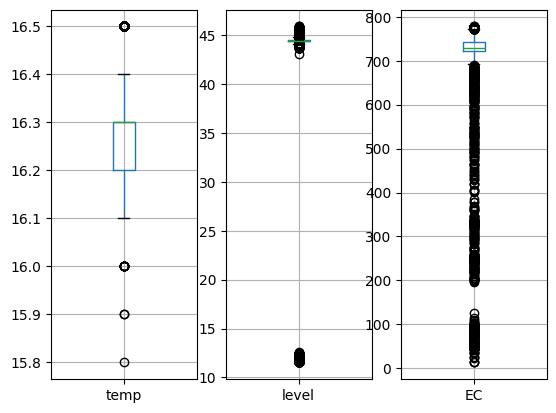

In [20]:
#코드 8-23
plt.subplot(1, 3, 1)
df.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df.boxplot(column='EC', return_type='both')
plt.show()

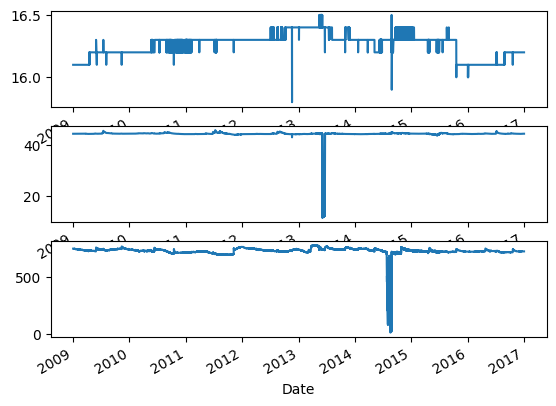

In [21]:
#코드 8-24
plt.subplot(3, 1, 1)
df['temp'].plot()
plt.subplot(3, 1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot()
plt.show()

In [22]:
#코드 8-25
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

0.17999999999999972


In [23]:
#코드 8-26
upper_level = q3_level + 1.5 * iqr_level
lower_level = q1_level - 1.5 * iqr_level
print(upper_level, '/', lower_level)
print((df['level'] > upper_level).sum())
print((df['level'] < lower_level).sum())

44.81999999999999 / 44.099999999999994
4492
1273


<Axes: xlabel='Date'>

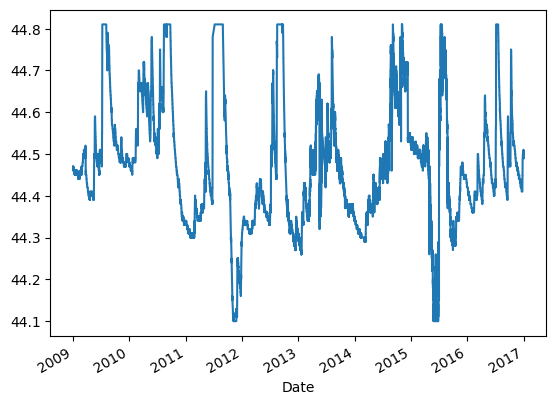

In [24]:
#코드 8-27
df_iqr_level = df[(df['level'] < upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot()

In [25]:
#코드 8-28
#사분위수와 IQR 구하기
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp-q1_temp
print('IQR:', iqr_temp)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5
print(upper_temp, '/', lower_temp)
print((df['temp'] > upper_temp).sum())
print((df['temp'] < lower_temp).sum())

IQR: 0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


In [26]:
#코드 8-29
#사분위수와 IQR 구하기
q3_ec = df['EC'].quantile(q=0.75)
q1_ec = df['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec
print('IQR:', iqr_ec)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_ec = q3_ec + iqr_ec * 1.5
lower_ec = q1_ec - iqr_ec * 1.5
print(upper_ec, '/', lower_ec)
print((df['EC'] > upper_ec).sum())
print((df['EC'] < lower_ec).sum())

IQR: 20.0
772.0 / 692.0
831
788


In [33]:
desc = df['EC'].describe()
iqr_ec2 = desc['75%'] - desc['25%']
print('IQR:', iqr_ec)

IQR: 20.0


In [ ]:
from scipy.stats import iqr

iqr_ec3 = iqr(df['EC'])
print('IQR:', iqr_ec)

IQR: 20.0


In [35]:
from scipy.stats import iqr

q1, q3 = df['EC'].quantile([0.25, 0.75])
iqr_ec = iqr(df['EC'])

lower_bound = q1 - 1.5 * iqr_ec
upper_bound = q3 + 1.5 * iqr_ec

print(lower_bound, upper_bound)

692.0 772.0


In [37]:
outliers = df[(df['EC'] < lower_bound) | (df['EC'] > upper_bound)]
outliers

,temp,level,EC
Date,,,
2013-03-25 15:00:00,16.4,44.49,773
2013-03-25 16:00:00,16.4,44.48,773
2013-03-25 17:00:00,16.4,44.50,773
2013-03-25 18:00:00,16.4,44.49,773
2013-03-25 19:00:00,16.4,44.49,773
...,...,...,...
2014-08-27 12:00:00,16.2,44.96,96
2014-08-27 11:00:00,16.2,44.96,81
2014-08-27 10:00:00,16.2,44.97,76


In [ ]:
#코드 8-30 이상치 제거
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
            (df['level'] < upper_level) & (df['level'] > lower_level) &\
             (df['EC'] < upper_ec) & (df['EC'] > lower_ec)]

In [28]:
#코드 8-31
df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


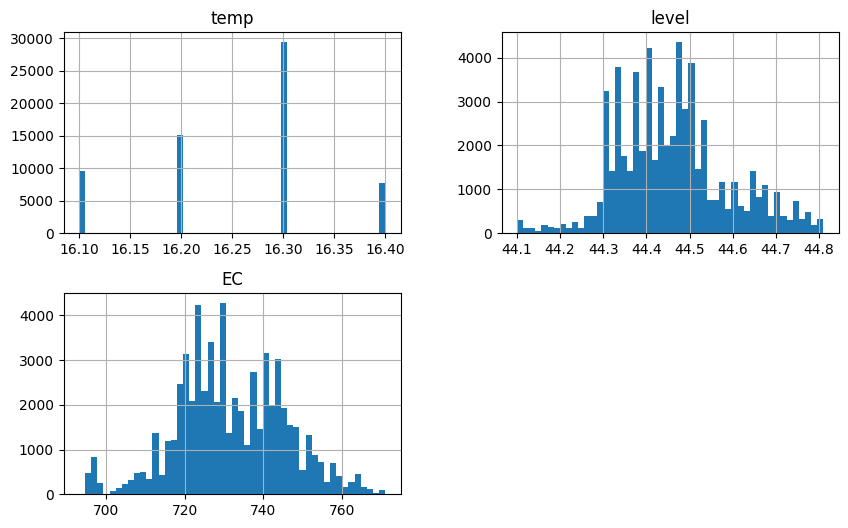

In [29]:
#코드 8-32
df_iqr.hist(bins=50, figsize=(10,6))
plt.show()

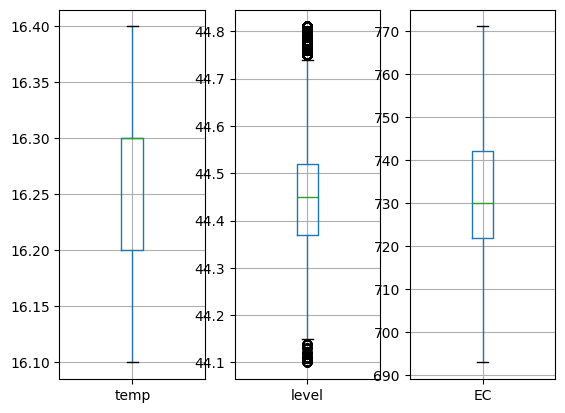

In [30]:
#코드 8-33
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC', return_type='both')
plt.show()

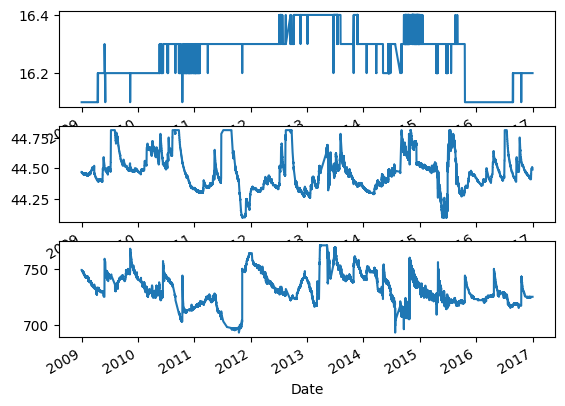

In [31]:
#코드 8-34
plt.subplot(3, 1, 1)
df_iqr['temp'].plot()
plt.subplot(3, 1, 2)
df_iqr['level'].plot()
plt.subplot(3, 1, 3)
df_iqr['EC'].plot()
plt.show()

In [32]:
#코드 8-35
df_iqr.to_csv('대전지하수_정제.csv', encoding='cp949')

### **3. 표준화와 정규화**

In [38]:
#코드 8-36
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./대전지하수_정제.csv')
df.head()

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749
4,2009-01-01 04:00:00,16.1,44.47,749


In [39]:
#코드 8-37
df = df[['level', 'EC']]
df.describe()

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


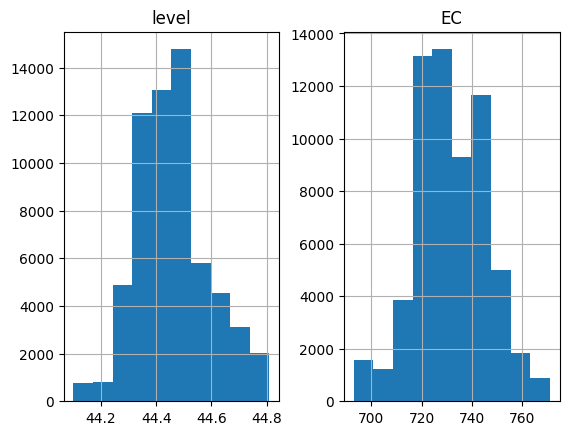

In [40]:
#코드 8-38
df.hist()
plt.show()

In [41]:
#코드 8-39
df1 = df.copy()
df1.head(3)

,level,EC
0,44.47,749
1,44.47,749
2,44.47,749


In [42]:
#코드 8-40
df1['level_z_score'] = (df1['level'] - df1['level'].mean()) / df1['level'].std()
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std()
df1.head(3)

,level,EC,level_z_score,EC_z_score
0,44.47,749,0.0803,1.246237
1,44.47,749,0.0803,1.246237
2,44.47,749,0.0803,1.246237


In [43]:
#코드 8-41
df1.describe()

,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,6.867116e-14,-2.052521e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


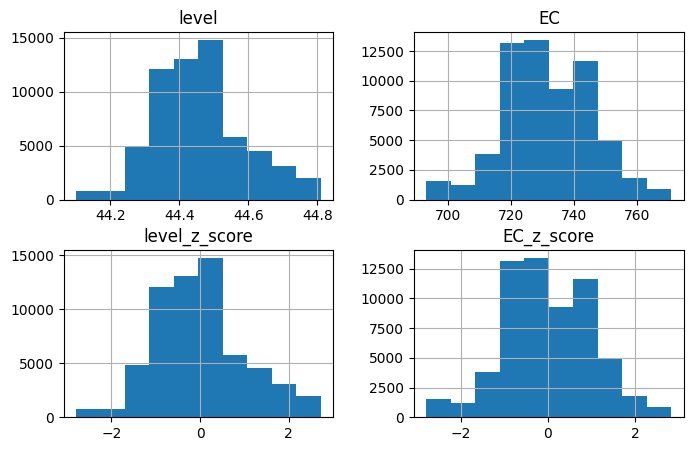

In [44]:
#코드 8-42
df1.hist(figsize=(8,5))
plt.show()

In [45]:
#코드 8-43
df2 = df.copy()
df2_standard = (df2-df2.mean()) / df2.std()
df2_standard.head(3)

,level,EC
0,0.0803,1.246237
1,0.0803,1.246237
2,0.0803,1.246237


In [ ]:
# standardScaler 사용해서 표준화화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_standard = pd.DataFrame(
    scaler.fit_transform(df2),   # df2를 표준화
    columns=df2.columns          # 컬럼 이름 유지
)
df2_standard.head(3)

,level,EC
0,0.080301,1.246247
1,0.080301,1.246247
2,0.080301,1.246247


In [46]:
#코드 8-44
df3 = df.copy()

df3['level_minmax'] = (df3['level']-df3['level'].min()) / (df3['level'].max()\
                                                           -df3['level'].min())
df3['EC_minmax'] = (df3['EC'] - df3['EC'].min()) / (df3['EC'].max() - df3['EC'].min())
df3.head(3)

,level,EC,level_minmax,EC_minmax
0,44.47,749,0.521127,0.717949
1,44.47,749,0.521127,0.717949
2,44.47,749,0.521127,0.717949


In [ ]:
# MinMaxScaler 사용해서 정규화
from sklearn.preprocessing import MinMaxScaler

df4 = df.copy()

scaler = MinMaxScaler()

df4[['level_minmax', 'EC_minmax']] = scaler.fit_transform(df3[['level', 'EC']])

df4.head(3)

,level,EC,level_minmax,EC_minmax
0,44.47,749,0.521127,0.717949
1,44.47,749,0.521127,0.717949
2,44.47,749,0.521127,0.717949


In [47]:
#코드 8-45
df3.describe()

,level,EC,level_minmax,EC_minmax
count,61814.000000,61814.000000,61814.000000,61814.000000
mean,44.459701,731.698612,0.506621,0.496136
std,0.128256,13.882905,0.180642,0.177986
min,44.100000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.380282,0.371795
50%,44.450000,730.000000,0.492958,0.474359
75%,44.520000,742.000000,0.591549,0.628205
max,44.810000,771.000000,1.000000,1.000000


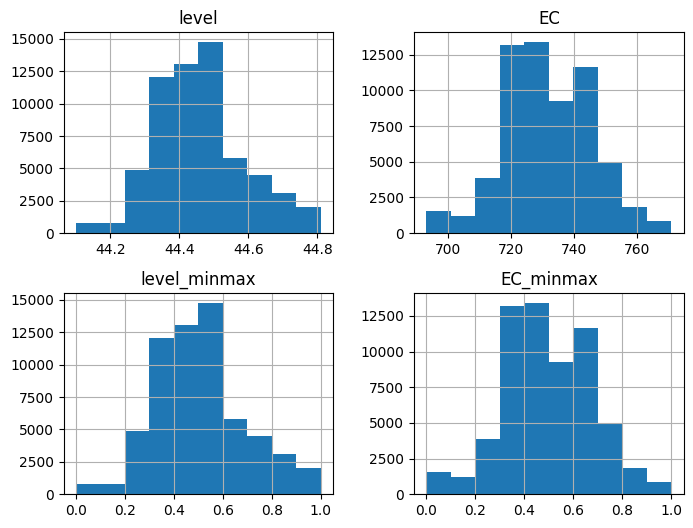

In [48]:
#코드 8-46
df3.hist(figsize=(8,6))
plt.show()